In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd

In [14]:
X_train= pd.read_csv("D:/customer_churn/data/processed/X_train.csv")
X_test= pd.read_csv("D:/customer_churn/data/processed/X_test.csv")
y_train= pd.read_csv("D:/customer_churn/data/processed/y_train.csv")
y_test= pd.read_csv("D:/customer_churn/data/processed/y_test.csv")

In [15]:
lr = LogisticRegression(max_iter=500)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("Logistic Regression Results")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Results
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1035
           1       0.66      0.56      0.60       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



C:\Users\aruns\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Logistic Regression achieved ~80% accuracy with strong performance on non-churn customers and moderate recall for churners.


In [16]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Results")
print(classification_report(y_test, y_pred_rf))


C:\Users\aruns\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Results
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.63      0.49      0.56       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



## 6. Model Comparison

| Model               | Accuracy | Precision (Churn) | Recall (Churn) | F1 (Churn) |
|--------------------|----------|-------------------|----------------|------------|
| Logistic Regression | 0.80     | 0.65              | 0.55           | 0.60       |
| Random Forest       | 0.80     | 0.67              | 0.48           | 0.56       |

### Key Observations:
- Both models achieve similar overall accuracy (≈80%).
- Logistic Regression has slightly better **recall** for churners (55%).
- Random Forest has slightly better **precision**, but weaker recall.
- Recall is more important for churn prediction (you don’t want to miss churners).
- Logistic Regression becomes the preferred baseline model.


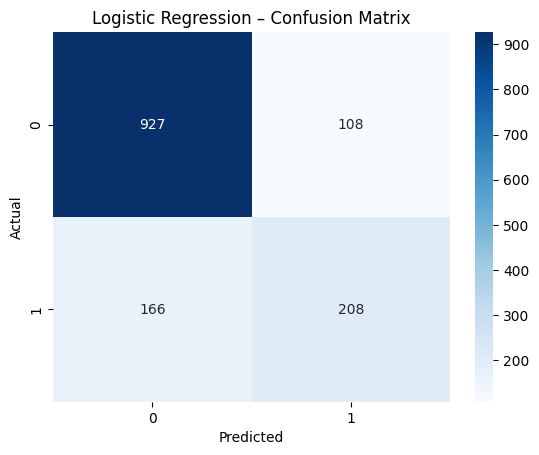

In [17]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression – Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [18]:
y_prob_lr = lr.predict_proba(X_test)[:,1]
auc_lr = roc_auc_score(y_test, y_prob_lr)
auc_lr


0.8420134852359916

In [19]:
y_prob_rf = rf.predict_proba(X_test)[:,1]
auc_rf = roc_auc_score(y_test, y_prob_rf)
auc_rf


0.8260766230075693

In [20]:
from sklearn.metrics import precision_score, recall_score

thresholds = [0.3, 0.4, 0.5, 0.6]

for t in thresholds:
    preds = (y_prob_lr >= t).astype(int)
    r = recall_score(y_test, preds)
    p = precision_score(y_test, preds)
    print(f"Threshold = {t}: Recall={r:.2f}, Precision={p:.2f}")


Threshold = 0.3: Recall=0.75, Precision=0.52
Threshold = 0.4: Recall=0.67, Precision=0.57
Threshold = 0.5: Recall=0.56, Precision=0.66
Threshold = 0.6: Recall=0.40, Precision=0.72


In [22]:
import joblib
joblib.dump(lr, "D:/customer_churn/models/logistic_regression_model.pkl")


['D:/customer_churn/models/logistic_regression_model.pkl']

In [21]:
list(X_train.columns)

['seniorcitizen',
 'tenure',
 'monthlycharges',
 'totalcharges',
 'gender_Male',
 'partner_Yes',
 'dependents_Yes',
 'phoneservice_Yes',
 'multiplelines_No phone service',
 'multiplelines_Yes',
 'internetservice_Fiber optic',
 'internetservice_No',
 'onlinesecurity_No internet service',
 'onlinesecurity_Yes',
 'onlinebackup_No internet service',
 'onlinebackup_Yes',
 'deviceprotection_No internet service',
 'deviceprotection_Yes',
 'techsupport_No internet service',
 'techsupport_Yes',
 'streamingtv_No internet service',
 'streamingtv_Yes',
 'streamingmovies_No internet service',
 'streamingmovies_Yes',
 'contract_One year',
 'contract_Two year',
 'paperlessbilling_Yes',
 'paymentmethod_Credit card (automatic)',
 'paymentmethod_Electronic check',
 'paymentmethod_Mailed check']

In [23]:
import joblib
joblib.dump(scaler, "models/scaler.pkl")


NameError: name 'scaler' is not defined